In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import numpy as np
import pathlib
import random


In [2]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak\test'
There are 0 directories and 250 images in 'pizza_steak\test\pizza'
There are 0 directories and 250 images in 'pizza_steak\test\steak'
There are 2 directories and 0 images in 'pizza_steak\train'
There are 0 directories and 750 images in 'pizza_steak\train\pizza'
There are 0 directories and 750 images in 'pizza_steak\train\steak'


In [3]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [4]:
# get class names - names of folders in directory "pizza_steak/train"
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
# visualise images
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")
    return img

Image shape: (382, 512, 3)


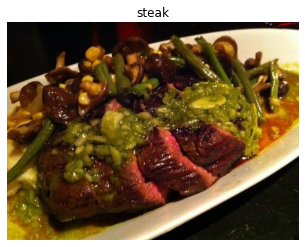

In [6]:
img = view_random_image("pizza_steak/train/", "steak")
# tf.constant(img)

In [11]:
tf.random.set_seed(42)

# normalize data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path to directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=64,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="elu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="elu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="elu"),
    tf.keras.layers.Conv2D(10, 3, activation="elu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])

history = model_1.fit(train_data,
                      epochs=15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/15
24/24 [==============================] - 5s 170ms/step - loss: 0.5867 - accuracy: 0.7020 - val_loss: 0.5922 - val_accuracy: 0.6700
Epoch 2/15
24/24 [==============================] - 4s 166ms/step - loss: 0.5106 - accuracy: 0.7620 - val_loss: 0.4388 - val_accuracy: 0.7900
Epoch 3/15
24/24 [==============================] - 4s 167ms/step - loss: 0.4732 - accuracy: 0.7880 - val_loss: 0.4305 - val_accuracy: 0.8140
Epoch 4/15
24/24 [==============================] - 4s 166ms/step - loss: 0.4427 - accuracy: 0.8060 - val_loss: 0.4035 - val_accuracy: 0.8220
Epoch 5/15
24/24 [==============================] - 4s 166ms/step - loss: 0.4220 - accuracy: 0.8093 - val_loss: 0.3929 - val_accuracy: 0.8200
Epoch 6/15
24/24 [==============================] - 4s 168ms/step - loss: 0.4086 - accuracy: 0.8220 - val_loss: 0.3851 - val_accuracy: 0.8260
Epoch 7/15
24/24 [==============================] - 4s 171ms/step